In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("C:/Users/Vyshu/Desktop/Manu/CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#It is to know number of rows and columns in our dataset
data.shape

(205, 26)

In [5]:
#checking for number of null values in each column
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<h1>Exploratory Data Analysis(EDA)</h1>


In [7]:
data_EDA = data.copy()
data_EDA.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0.5, 1.0, 'Distribution of Car Prices by Fuel type')

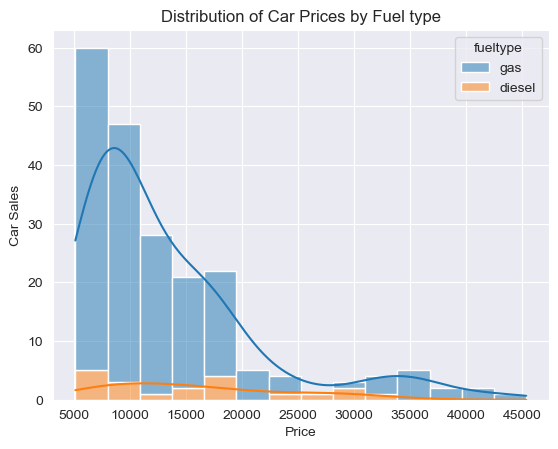

In [8]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='fueltype',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribution of Car Prices by Fuel type")

What this plot shows

You’ll get a histogram that:

Shows how car prices are distributed (how frequently cars are sold at different prices).

Separates this information by fuel type using color (e.g., Petrol vs Diesel).

Uses stacked bars so you can see the total as well as the composition by fuel type.

Includes a KDE curve for a smooth estimate of the distribution.

Text(0.5, 1.0, 'Distribution of Car Prices by Aspiration')

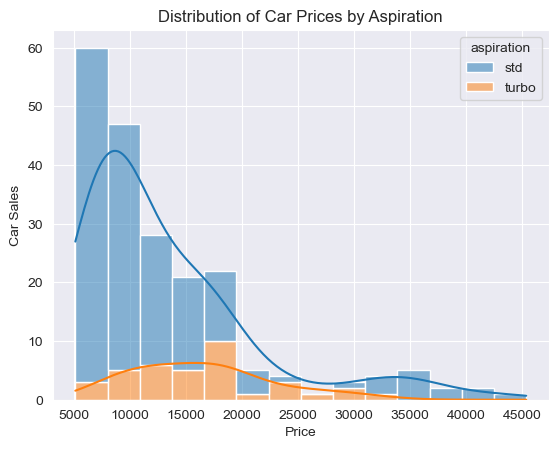

In [9]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='aspiration',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribution of Car Prices by Aspiration")

What this plot shows

You will get a histogram that:

The majority of cars in the dataset have standard (std) aspiration

Turbocharged cars are fewer in number compared to standard ones.

Most standard-aspiration cars are concentrated at the lower price ranges.

Overall, turbo cars are relatively less common but can be associated with higher-priced models.


Text(0.5, 1.0, 'Distribution of Car Prices by Door Number')

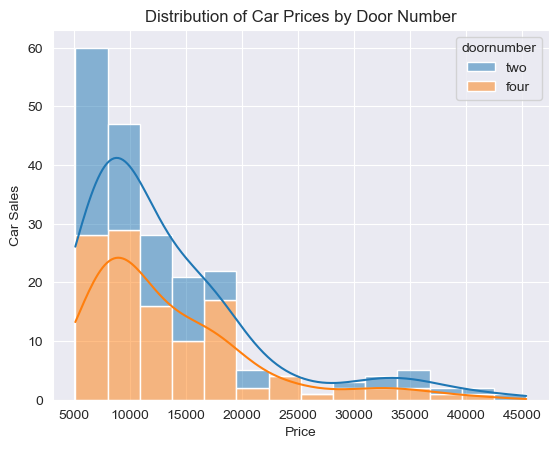

In [10]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='doornumber',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribution of Car Prices by Door Number")
     

This plot shows:

The plot shows the distribution of car prices, split by the door numbers (two , four).

Two door cars are lower price, with a higher frequency of sales at cheaper price points.

Four door cars are more wider range of prices, showing a more even distribution between lower and mid-range prices.

The number of two door cars tends to decrease as the price increases, indicating that fewer high-priced two door cars exist in the dataset.


Text(0.5, 1.0, 'Distribution of cacr prices by carbody')

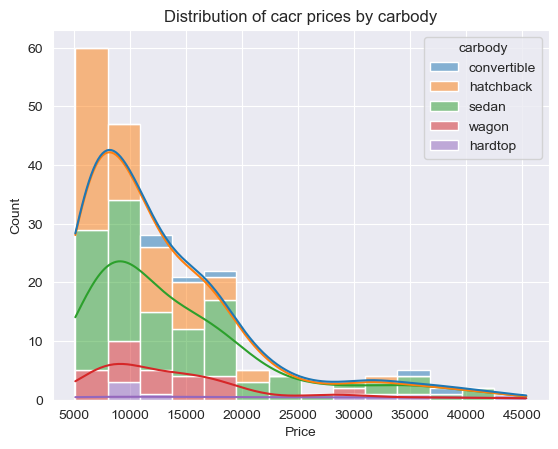

In [11]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='carbody',multiple='stack')
plt.ylabel("Count")
plt.xlabel("Price")
plt.title("Distribution of cacr prices by carbody")


This plot shows:

It displays the distribution of car prices, based on car body type (convertible, hatchback, sedan, wagon, hardtop).

Sedan cars are having the highest number of sales, with a large portion concentrated in the mid-range price points.

Hatchbacks and convertibles are having smaller number of sales, and their price distributions are more with fewer cars in the higher price ranges.

Text(0.5, 1.0, 'Distribution of car prices by drivewheel')

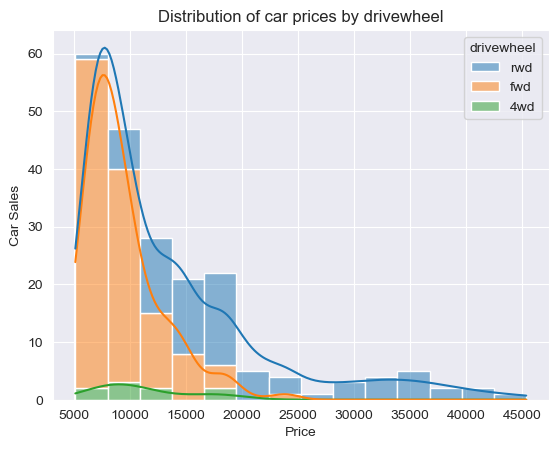

In [12]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='drivewheel',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by drivewheel")

Here:

The plot shows the distribution of car prices, on the type of drivewheel (front-wheel drive, rear-wheel drive, or 4-wheel drive).

Front-wheel drive (FWD) cars dominate in more number of sales, with a high frequency of cars priced in the lower to mid-range.

Rear-wheel drive (RWD) and all-wheel drive (4WD) cars are less , with their distributions spread across a wider price range, indicating that these types may appeal to different market segments.


Text(0.5, 1.0, 'Distribition of car prices by engine location')

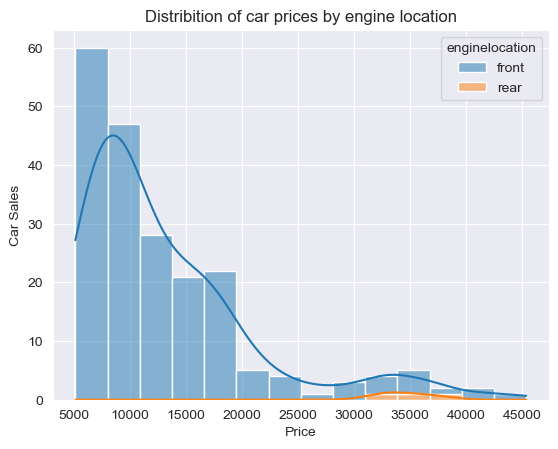

In [13]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='enginelocation',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribition of car prices by engine location")

Here:

The plot shows the distribution of car prices, on engine location (front-engine vs. rear-engine).

Front-engine cars dominate the dataset, with a significantly higher count of sales, and most of these cars are priced in the lower to mid-price range.

Rear-engine cars, which are less common, are spread across a wider price range, though they tend to show lower sales overall.

Text(0.5, 1.0, 'Distribution of car prices by engine type')

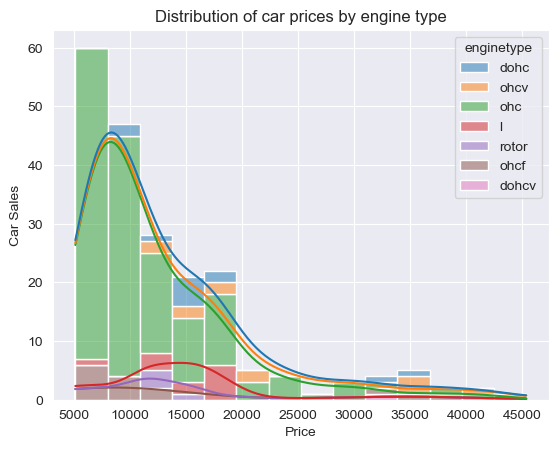

In [14]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='enginetype',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by engine type")

Here:

The plot shows the distribution of car prices, on engine type.

ohc engines are the most common, with the highest count of sales, and these cars are in the lower to mid-price range.

ohcv and dohc engines are less common, with their distributions spanning across higher price ranges.

These engine types may indicate cars that are larger or more powerful, and are priced at a premium.

Text(0.5, 1.0, 'Distribution of car prices by cylinder number')

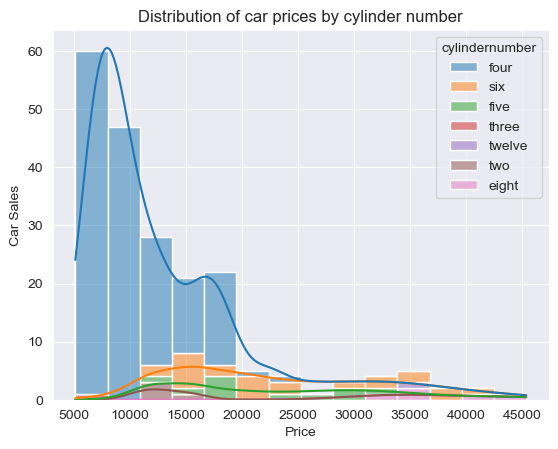

In [15]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='cylindernumber',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by cylinder number")

Here;

This plot shows the distribution of car prices grouped by number of cylinders ( 4,6,5,.....8 cylinders ).

4-cylinder cars dominate the dataset, with the highest count of sales, mainly in the lower to mid-price range.

Cars with 5, 6, and 8 cylinders are less and appears at higher price points, indicating that vehicles with more cylinders (and likely more powerful engines) are priced higher.

Cars with 3 cylinders or 2 cylinders (if present) are very rare and usually priced lower, typically representing compact or budget vehicles.


Text(0.5, 1.0, 'Distribution of car prices by Fueltype')

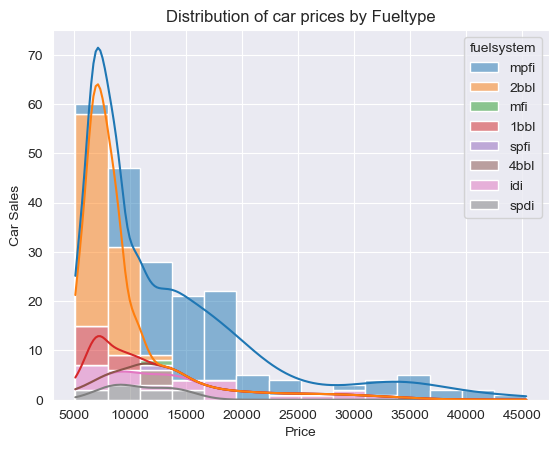

In [16]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='fuelsystem',multiple='stack')
plt.ylabel("Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by Fueltype")

Here:

The plot shows the distribution of car prices grouped by fuel system ( MPFI, 2BBL, 1BBL, MFI etc.).

MPFI (Multi-Point Fuel Injection) is the most common fuel system, with the highest number of cars sold, especially in the lower to mid-price range.

2BBL (Two-barrel carburetor) and 1BBL (Single-barrel carburetor) systems are less common and are mostly concentrated at lower price points, indicating older or simpler engine technologies

<Axes: xlabel='price'>

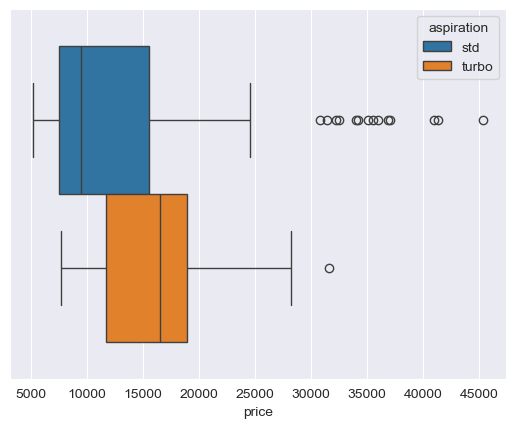

In [17]:
#boxplot()
sns.boxplot(data=data_EDA,x='price',hue='aspiration')

Inferences :
1.Price Difference by Aspiration Type:

Turbocharged cars (aspiration='turbo') generally have higher median prices than standard cars.

This reflects that turbo cars are often positioned as performance variants, hence they command a premium.

2.Price Range and Spread:

Turbo cars often show a wider interquartile range (IQR), indicating greater variability in price — perhaps due to diverse models or luxury vs. economy turbo cars.

Standard aspiration cars usually have a narrower IQR, suggesting more consistency in pricing.

In [18]:
lab_obj=LabelEncoder()
data_EDA["fueltype"]=lab_obj.fit_transform(data_EDA["fueltype"])
data_EDA["aspiration"]=lab_obj.fit_transform(data_EDA["aspiration"])
data_EDA["doornumber"]=lab_obj.fit_transform(data_EDA["doornumber"])
data_EDA["carbody"]=lab_obj.fit_transform(data_EDA["carbody"])
data_EDA["drivewheel"]=lab_obj.fit_transform(data_EDA["drivewheel"])
data_EDA["enginelocation"]=lab_obj.fit_transform(data_EDA["enginelocation"])
data_EDA["enginetype"]=lab_obj.fit_transform(data_EDA["enginetype"])
data_EDA["cylindernumber"]=lab_obj.fit_transform(data_EDA["cylindernumber"])
data_EDA["fuelsystem"]=lab_obj.fit_transform(data_EDA["fuelsystem"])

data_EDA=data_EDA.drop("car_ID",axis=1)
data_EDA=data_EDA.drop("CarName",axis=1)
data_EDA.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


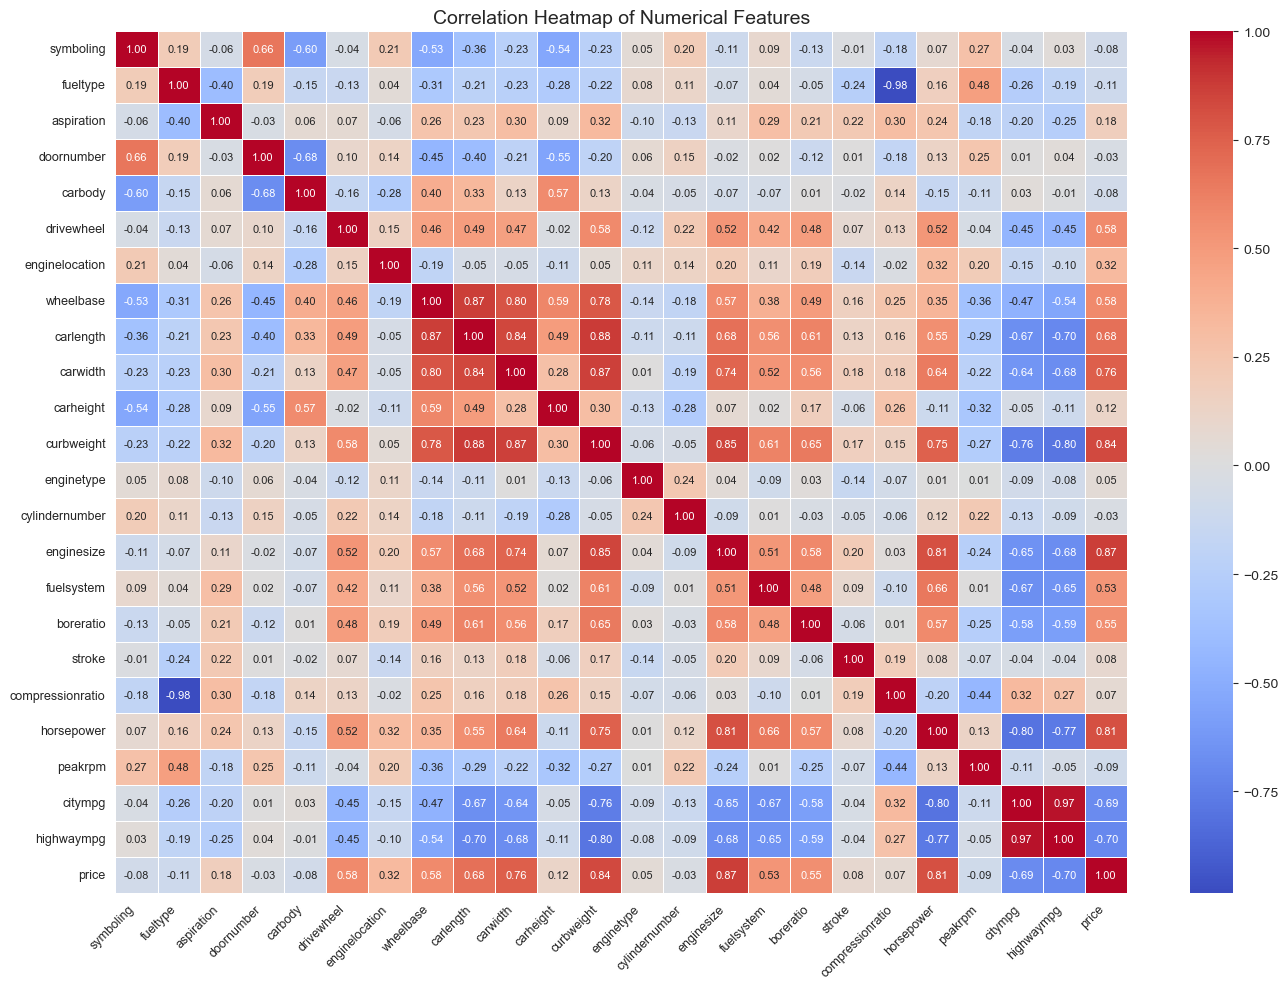

In [56]:
corr_matrix=data_EDA.corr()

plt.figure(figsize=(14,10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidth=0.5,
    annot_kws={"size":8}
)

plt.xticks(rotation=45,ha='right',fontsize=9)
plt.yticks(rotation=0,fontsize=9)
plt.title("Correlation Heatmap of Numerical Features",fontsize=14)
plt.tight_layout()
plt.show()

Inferences:
Price-Related Correlations

price vs engine-size, horsepower, curb-weight:
 Likely to show strong positive correlation (e.g., price and engine-size > 0.70)
 Bigger engines, more powerful cars, and heavier builds usually lead to higher prices.

price vs city-mpg / highway-mpg:
 Likely to show negative correlation (e.g., -0.60 or lower)
 More fuel-efficient cars tend to be cheaper, while performance-oriented vehicles (less fuel-efficient) are pricier.

Feature Redundancy

engine-size vs horsepower:
 Strong positive correlation likely.
 These may be collinear — meaning including both in a regression model without addressing multicollinearity may cause instability.

city-mpg vs highway-mpg:
 High correlation expected.
 These are often redundant; you could create a new combined feature (e.g., average mpg) to reduce dimensionali

## Data preprocessing

In [57]:
#Cheking for Nan values 
data.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [58]:
## Basics Statistics for our data 
data.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

<h6>from the above we can observe some columns have categorical data we need to transform it into numerical using Feature transform techniques</h6>


In [60]:
#convert cat into int
from sklearn.preprocessing import LabelEncoder
lab_obj = LabelEncoder()

data["fueltype"] = lab_obj.fit_transform(data["fueltype"])
data["aspiration"] = lab_obj.fit_transform(data["aspiration"])
data["doornumber"] = lab_obj.fit_transform(data["doornumber"])
data["carbody"] = lab_obj.fit_transform(data["carbody"])
data["drivewheel"] = lab_obj.fit_transform(data["drivewheel"])
data["enginelocation"] = lab_obj.fit_transform(data["enginelocation"])
data["enginetype"] = lab_obj.fit_transform(data["enginetype"])
data["cylindernumber"] = lab_obj.fit_transform(data["cylindernumber"])
data["fuelsystem"] = lab_obj.fit_transform(data["fuelsystem"])

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [25]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
#Drop unwanted columns 
data = data.drop("car_ID",axis=1)
data = data.drop("CarName",axis=1)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
#Divide the features into independent and dependent variables in terms of X and Y
x = data.iloc[:, 0:-1]
y = data.iloc[:, [-1]]


In [28]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
x_scl = MinMaxScaler()
y_scl = MinMaxScaler()

x = x_scl.fit_transform(x)
y = y_scl.fit_transform(y)

In [29]:
# spliting data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<h1>Linear Model Building</h1>

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [31]:
#fitting data to model
reg.fit(x,y)

LinearRegression()

In [32]:
reg.score(x,y)

0.8802434927425343

In [33]:
#making predictions 
y_predict = reg.predict(x_test)

In [34]:
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(y_pred=y_predict,y_true=y_test)
RMSE

0.08439691738088735

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
y_predict=reg.predict(x_test)

In [53]:
from sklearn.metrics import root_mean_squared_error

In [54]:
RMSE=root_mean_squared_error(y_pred=y_predict,y_true=y_test)
RMSE 
MAE = mean_absolute_error(y_pred=y_predict,y_true=y_test)
MAE
MSE = mean_squared_error(y_pred=y_predict,y_true=y_test)
MSE
print("root_mean_squared_error = ",RMSE)
print("mean_absolute_error =",MAE)
print("mean_squared_error =", MSE)


root_mean_squared_error =  0.08439691738088735
mean_absolute_error = 0.05592786451369217
mean_squared_error = 0.0071228396633963255


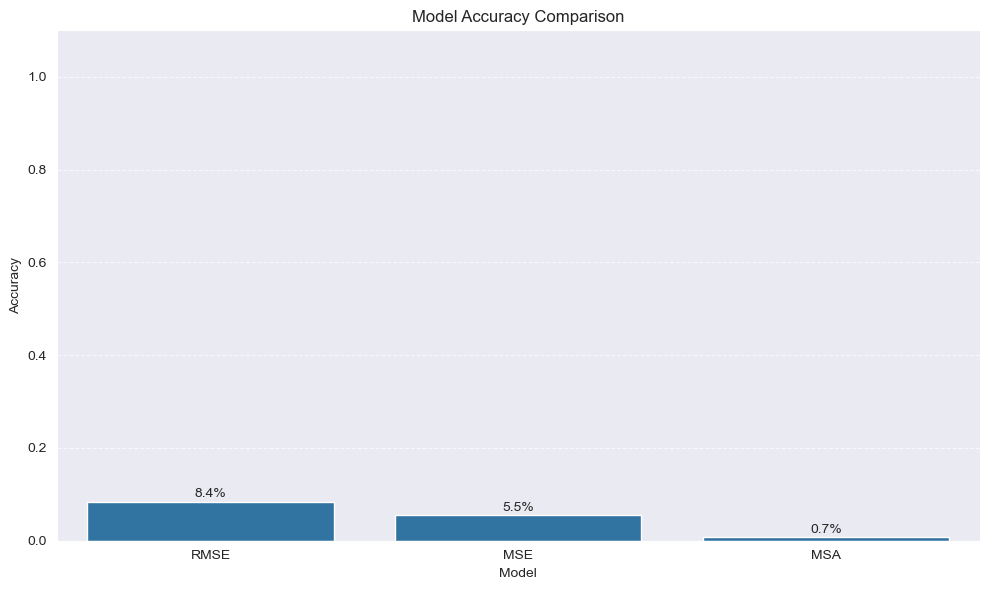

In [55]:
c={ 'Model':['RMSE','MSE','MSA'],
    'Accuracy':[0.084,0.055,0.007]}
df=pd.DataFrame(c)
plt.figure(figsize=(10,6))
barplot=sns.barplot(x='Model',y='Accuracy',data=df,)
for i, bar in enumerate(barplot.patches):
    height=bar.get_height()
    plt.text(
             bar.get_x()+bar.get_width()/2,
             height+0.01,
             f'{height*100:.1f}%',
             ha='center',
             fontsize=10
    )
    plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Polynomial regression

In [65]:
import pandas as pd
import numpy as np

In [67]:
data = pd.read_csv("C:/Users/Vyshu/Desktop/Manu/CarPrice_Assignment.csv")

In [68]:
#convert cat into int
from sklearn.preprocessing import LabelEncoder
lab_obj = LabelEncoder()

data["fueltype"] = lab_obj.fit_transform(data["fueltype"])
data["aspiration"] = lab_obj.fit_transform(data["aspiration"])
data["doornumber"] = lab_obj.fit_transform(data["doornumber"])
data["carbody"] = lab_obj.fit_transform(data["carbody"])
data["drivewheel"] = lab_obj.fit_transform(data["drivewheel"])
data["enginelocation"] = lab_obj.fit_transform(data["enginelocation"])
data["enginetype"] = lab_obj.fit_transform(data["enginetype"])
data["cylindernumber"] = lab_obj.fit_transform(data["cylindernumber"])
data["fuelsystem"] = lab_obj.fit_transform(data["fuelsystem"])


#Drop unwanted columns 
data = data.drop("car_ID",axis=1)
data = data.drop("CarName",axis=1)

#Divide the features into independent and dependent variables in terms of X and Y
x = data.iloc[:, 0:-1]
y = data.iloc[:, [-1]]

In [69]:
#Feature Scaling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
x_scl = StandardScaler()
y_scl = StandardScaler()

x = x_scl.fit_transform(x)
y = y_scl.fit_transform(y)

In [70]:

# spliting data into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [71]:
# Create Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

#Fit Linear Regression on polynomial features
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [72]:
model.score(x, y)

0.9987417161615677

In [73]:
model.score(x_poly_test, y_test)

0.999540174789582

In [75]:
#Step 4: Make predictions
y_pred = model.predict(x_poly_test)

In [78]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_pred=y_pred,y_true=y_test)
RMSE 
MAE = mean_absolute_error(y_pred=y_pred,y_true=y_test)
MAE
MSE = mean_squared_error(y_pred=y_pred,y_true=y_test)
MSE
print("root_mean_squared_error = ",RMSE)
print("mean_absolute_error =",MAE)
print("mean_squared_error =", MSE)


root_mean_squared_error =  0.023907461422925103
mean_absolute_error = 0.007918071215980961
mean_squared_error = 0.000571566711688652


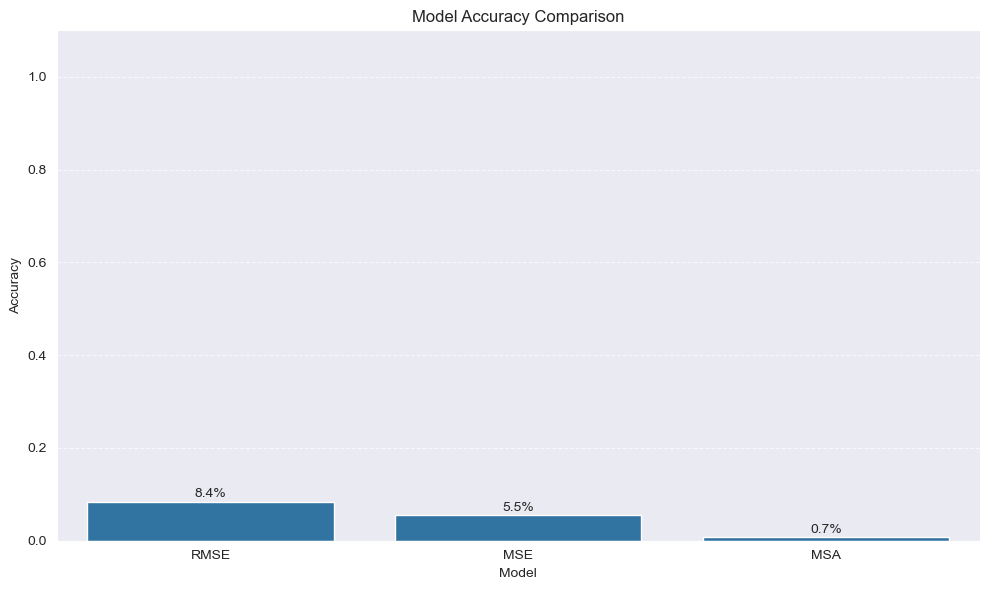

In [79]:
c={ 'Model':['RMSE','MSE','MSA'],
    'Accuracy':[0.084,0.055,0.007]}
df=pd.DataFrame(c)
plt.figure(figsize=(10,6))
barplot=sns.barplot(x='Model',y='Accuracy',data=df,)
for i, bar in enumerate(barplot.patches):
    height=bar.get_height()
    plt.text(
             bar.get_x()+bar.get_width()/2,
             height+0.01,
             f'{height*100:.1f}%',
             ha='center',
             fontsize=10
    )
    plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  
#plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()